In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [2]:
# 입력 레이어를 정의합니다.
inputs = Input(shape=(784,))

# 첫 번째 Dense 레이어 추가
x = Dense(512, activation='relu')(inputs)

# 출력 레이어 추가
outputs = Dense(10, activation='sigmoid')(x)

# 모델 구성
model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [3]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0251 - accuracy: 0.8744
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0129 - accuracy: 0.9312
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0101 - accuracy: 0.9458
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0085 - accuracy: 0.9549
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0074 - accuracy: 0.9616


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9629
테스트 정확도: 0.9628999829292297


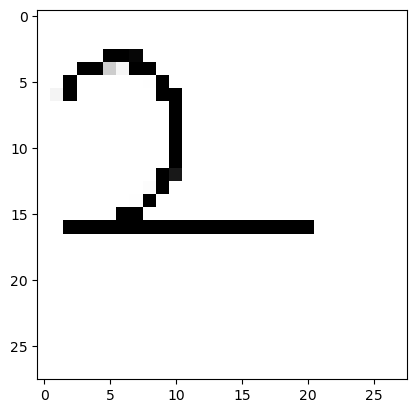

In [6]:
import cv2 as cv

image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /=255.0

plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.show()

In [7]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

1/1 [==============================] - 0s 62ms/step
추정된 숫자= 4
